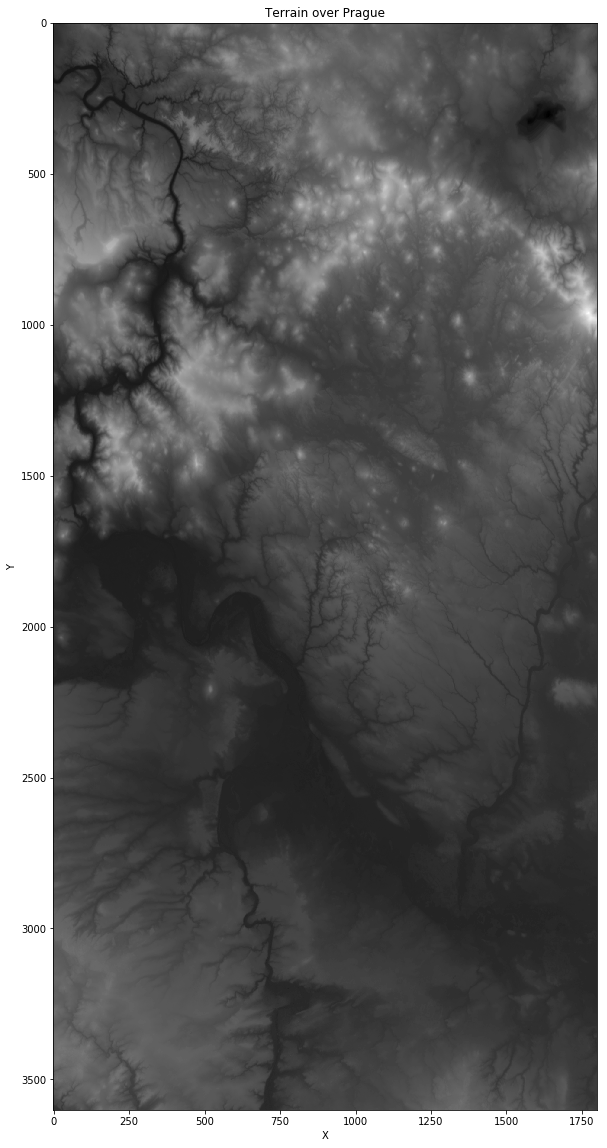

In [11]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
# Load the terrain
terrain1 = imread('data/n50_e014_1arc_v3.tif')
# Show the terrain
plt.figure(figsize=(30,20))
plt.title('Terrain over Prague')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
print(terrain1)

In [ ]:
print(np.size(terrain1,1))

In [ ]:
print(terrain1[0:10,0:10])

In [2]:
x = np.arange(0, 1801, 1)
y = np.arange(3600, -1, -1)
#x = np.random.rand(100,1)
#y = np.random.rand(100,1)
#print(x)
#print(y)
x, y = np.meshgrid(x,y)


In [ ]:
print(x)
print(y)

In [ ]:
def plotTheSurface(x,y,z):
# Plot the surface.
    fig = plt.figure()
    ax = fig.gca(projection='3d')


    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    #surf.view_init(elev=10., azim=0)
# Customize the z axis.
#ax.set_zlim(-0.10, 1.40)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show();

In [ ]:
plotTheSurface(x,y,terrain1)

In [3]:
from sklearn.linear_model import Lasso

xVector=np.matrix.flatten(x)
yVector=np.matrix.flatten(y)
#vectorSize=np.size(yVector,0)
zVector=np.matrix.flatten(terrain1)
vectorSize=np.size(yVector,0)
xMatrix=np.c_[np.ones((vectorSize,1)), xVector, yVector,xVector**2,yVector**2,xVector*yVector,
                   xVector**3,yVector**3,(xVector**2)*yVector,(yVector**2)*xVector,
                      xVector**4,xVector*(yVector**3),(xVector**3)*yVector,(xVector**2)*(yVector**2),
                       (xVector**3)*yVector,yVector**4,
                       (xVector**2)*(yVector**2),xVector*(yVector**3),
                      xVector**5,(xVector**2)*(yVector**3),(xVector**4)*yVector,(xVector**3)*(yVector**2),
                       (xVector**4)*yVector,xVector*(yVector**4),
                       (xVector**3)*(yVector**2),(xVector**2)*(yVector**3),
                     xVector**4*yVector,xVector*(yVector**4),(xVector**3)*(yVector**2),(xVector**2)*(yVector**3),
                       (xVector**3)*(yVector**2),yVector**5,
                       (xVector**2)*(yVector**3),xVector*(yVector**4)]

lassoreg = Lasso(alpha=0.001,normalize=True,max_iter=1000)
lassoreg.fit(xMatrix,zVector)
z_pred = lassoreg.predict(xMatrix)

In [4]:
from sklearn.metrics import mean_squared_error
mean_squared_error(zVector, z_pred)


7696.111355532321

In [5]:
matrixSizey=np.size(y,0)
matrixSizex=np.size(x,1)
zPredictReshape=np.reshape(z_pred,(matrixSizey,matrixSizex))
print(zPredictReshape)

[[365.68899825 365.72221294 365.75542764 ... 424.44939671 424.47993986
  424.51047707]
 [365.65754535 365.69072854 365.72391173 ... 424.36130887 424.39182053
  424.42232624]
 [365.62607604 365.65922774 365.69237944 ... 424.27322036 424.30370052
  424.33417474]
 ...
 [276.46577288 276.44228178 276.41879068 ... 233.26915828 233.24299564
  233.21682706]
 [276.46574719 276.44225608 276.41876497 ... 233.26910899 233.24294634
  233.21677774]
 [276.46573863 276.44224751 276.4187564  ... 233.26909256 233.24292991
  233.21676131]]


In [ ]:
plotTheSurface(x,y,zPredictReshape)

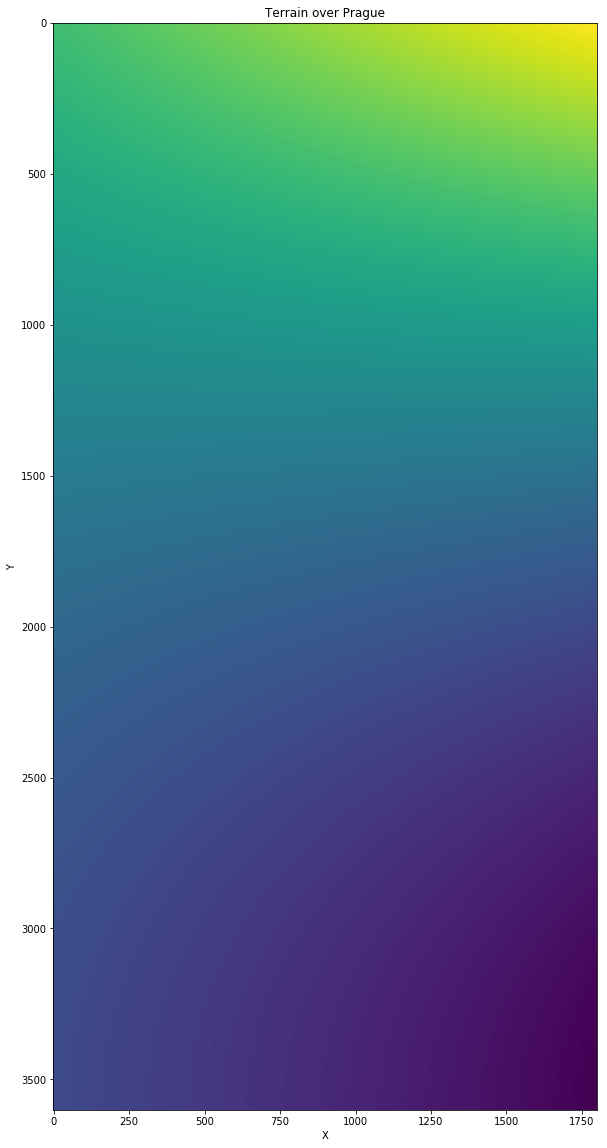

In [12]:
a=plt.figure(figsize=(30,20))
plt.title('Terrain over Prague')
plt.imshow(zPredictReshape, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()